# Se importan las librerías

In [1]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split

# machine learning
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import (RandomForestRegressor, AdaBoostRegressor,
                             GradientBoostingRegressor, ExtraTreesRegressor)

from sklearn.model_selection import (GridSearchCV, cross_val_score,
                                    StratifiedKFold)

ruta_actual = os.getcwd()
## Funciones
os.chdir('../')  # Establecemos el directorio de trabajo
from utils import funciones as fn
from utils import listas as ls
os.chdir(ruta_actual)

### Se quitan las advertencias

In [2]:
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

# Se carga el csv con los datos obtenidos en el EDA ya realizado

In [3]:
ruta_data_raw = f'../data/raw/df_venta_coches.csv'
df = pd.read_csv(ruta_data_raw,index_col=0)
df

,Marca,Modelo,Precio,Combustible,Anyo,Kilometros,Potencia,Vendedor_profesional,dealer,Comunidad_Autonoma
0,SEAT,Toledo,950,Diésel,2000.0,227000,111.923077,False,0f4bb8455d27349b8273109b66a847f3,Navarra
1,CITROEN,C1,6200,Gasolina,2017.0,50071,82.000000,True,Autos Raymara,Canarias
2,FORD,Transit Connect,7851,Diésel,2016.0,103000,100.000000,True,Auto 96,Catalunya
3,VOLKSWAGEN,Caravelle,19426,Diésel,2014.0,120000,140.000000,True,Inniauto,Navarra
4,FORD,Transit,22850,Diésel,2017.0,107000,130.000000,True,"Autofleet España,s.l",Andalucía
...,...,...,...,...,...,...,...,...,...,...
49732,HYUNDAI,i30,18490,Gasolina,2018.0,47000,140.000000,True,Flexicar Málaga,Andalucía
49733,RENAULT,Laguna,14500,Diésel,2015.0,68750,150.000000,True,Ocasion Plus,Andalucía
49734,PEUGEOT,108,11000,Gasolina,2019.0,21422,72.000000,True,Psa Retail Huelva,Andalucía
49735,AUDI,RS4,47900,Gasolina,2013.0,47900,450.000000,True,Codigocar Lugo,Galicia


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49737 entries, 0 to 49736
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Marca                 49737 non-null  object 
 1   Modelo                49737 non-null  object 
 2   Precio                49737 non-null  int64  
 3   Combustible           49737 non-null  object 
 4   Anyo                  49737 non-null  float64
 5   Kilometros            49737 non-null  int64  
 6   Potencia              49737 non-null  float64
 7   Vendedor_profesional  49737 non-null  bool   
 8   dealer                49737 non-null  object 
 9   Comunidad_Autonoma    49737 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(5)
memory usage: 3.8+ MB


# Se divide el dataframe en Train y Test

In [5]:
Train, Test = train_test_split(df, test_size=0.2, random_state=1234)

In [6]:
Train = Train.reset_index(drop=True) # se resetean los indices de los nuevos df que se han creado
Test = Test.reset_index(drop=True) # se resetean los indices de los nuevos df que se han creado

### Se guardan el df Train y Test en ficheros csv

In [7]:
Train.to_csv('../data/raw/Train.csv')
Test.to_csv('../data/raw/Test.csv')

# Se realizan las transformaciones necesarias sobre el Train

In [8]:
for i in Train.columns:
    print(f'la columna {i} tiene {df[i].nunique()} valores únicos')

la columna Marca tiene 73 valores únicos
la columna Modelo tiene 882 valores únicos
la columna Precio tiene 3342 valores únicos
la columna Combustible tiene 7 valores únicos
la columna Anyo tiene 51 valores únicos
la columna Kilometros tiene 14101 valores únicos
la columna Potencia tiene 844 valores únicos
la columna Vendedor_profesional tiene 2 valores únicos
la columna dealer tiene 12921 valores únicos
la columna Comunidad_Autonoma tiene 19 valores únicos


### Distribución de la variable `Precio`

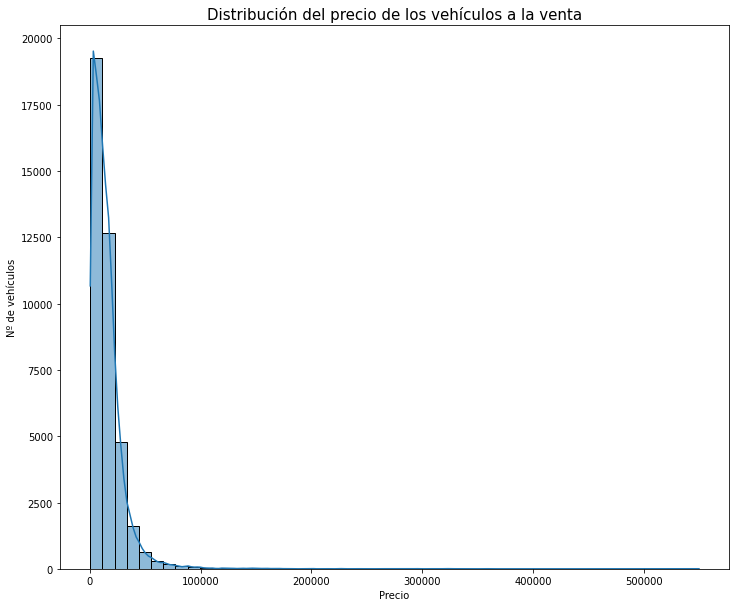

In [9]:
plt.figure(figsize=(12,10),facecolor='w');
plt.title('Distribución del precio de los vehículos a la venta', fontsize=15);
plt.ylabel('Nº de vehículos')
plt.xlabel('Precio')
sns.histplot(data=Train, x="Precio", bins=50, kde=True);

### Se eliminan los outliers

In [10]:
fn.outliers(Train)

,Precio,Anyo,Kilometros,Potencia
num_outliers,1720.0,229.0,378.0,3071.000000
valor_min,-16100.0,1990.5,-165440.0,31.697531
valor_max,41500.0,2034.5,377504.0,236.981481


In [11]:
filtro_outliers = (
    Train.Precio < 41500) & (
        Train.Potencia < 236.98) & (
            Train.Kilometros < 377504) & (
                Train.Anyo > 1990)

In [12]:
Train = Train[filtro_outliers]
Train

,Marca,Modelo,Precio,Combustible,Anyo,Kilometros,Potencia,Vendedor_profesional,dealer,Comunidad_Autonoma
1,BMW,Serie 1,14490,Diésel,2016.0,93142,116.0,True,Barcelona Premium,Catalunya
2,FORD,Focus,1800,Diésel,2002.0,122000,90.0,True,JCars.es,Comunidad_Valenciana
3,RENAULT,Megane,22800,Gasolina,2018.0,29060,205.0,True,Gaursa,País_Vasco
4,MERCEDES-BENZ,Clase SLK,25900,Gasolina,2011.0,34670,184.0,True,Carlos Cars,Comunidad_Valenciana
5,MERCEDES-BENZ,Clase E,29418,Diésel,2017.0,47100,194.0,True,Leasing Automobile,Comunidad_Valenciana
...,...,...,...,...,...,...,...,...,...,...
39784,BMW,Serie 5,10990,Diésel,2007.0,189000,231.0,False,f964ec386676ab3b4bae194d3fb7fd69,Cantabria
39785,PEUGEOT,Traveller,26000,Diésel,2019.0,17741,120.0,True,GRUPO DIMOLK,Galicia
39786,PEUGEOT,106,350,Gasolina,1993.0,189318,50.0,False,091706922f1f6360529d1e5e77039b86,Andalucía
39787,NISSAN,JUKE,13500,Gasolina,2017.0,33500,115.0,True,"NISSAN Barbera, Granollers, Terrassa, Igualada...",Catalunya


### Se clasifican las variables `Marca` y `Modelo`

In [14]:
fn.add_delete_columns(Train, 'Marca',fn.cluster_marcas,'Modelo',fn.cluster_modelo,'dealer')

,Precio,Combustible,Anyo,Kilometros,Potencia,Vendedor_profesional,Comunidad_Autonoma,Cluster_Marca,Cluster_Modelo
1,14490,Diésel,2016.0,93142,116.0,True,Catalunya,Premium,compacto_pequeno
2,1800,Diésel,2002.0,122000,90.0,True,Comunidad_Valenciana,Standard,compacto_grande
3,22800,Gasolina,2018.0,29060,205.0,True,País_Vasco,Standard,compacto_grande
4,25900,Gasolina,2011.0,34670,184.0,True,Comunidad_Valenciana,Premium,coupe_grande
5,29418,Diésel,2017.0,47100,194.0,True,Comunidad_Valenciana,Premium,sedan_grande
...,...,...,...,...,...,...,...,...,...
39784,10990,Diésel,2007.0,189000,231.0,False,Cantabria,Premium,sedan_grande
39785,26000,Diésel,2019.0,17741,120.0,True,Galicia,Standard,otro
39786,350,Gasolina,1993.0,189318,50.0,False,Andalucía,Standard,compacto_pequeno
39787,13500,Gasolina,2017.0,33500,115.0,True,Catalunya,Standard,suv_pequeno


In [15]:
Train

,Precio,Combustible,Anyo,Kilometros,Potencia,Vendedor_profesional,Comunidad_Autonoma,Cluster_Marca,Cluster_Modelo
1,14490,Diésel,2016.0,93142,116.0,True,Catalunya,Premium,compacto_pequeno
2,1800,Diésel,2002.0,122000,90.0,True,Comunidad_Valenciana,Standard,compacto_grande
3,22800,Gasolina,2018.0,29060,205.0,True,País_Vasco,Standard,compacto_grande
4,25900,Gasolina,2011.0,34670,184.0,True,Comunidad_Valenciana,Premium,coupe_grande
5,29418,Diésel,2017.0,47100,194.0,True,Comunidad_Valenciana,Premium,sedan_grande
...,...,...,...,...,...,...,...,...,...
39784,10990,Diésel,2007.0,189000,231.0,False,Cantabria,Premium,sedan_grande
39785,26000,Diésel,2019.0,17741,120.0,True,Galicia,Standard,otro
39786,350,Gasolina,1993.0,189318,50.0,False,Andalucía,Standard,compacto_pequeno
39787,13500,Gasolina,2017.0,33500,115.0,True,Catalunya,Standard,suv_pequeno


# Se guarda el dataframe con los datos preparados para el modelo 

In [16]:
Train.to_csv('../data/clean/Train_clean.csv')